<a href="https://colab.research.google.com/github/Himalaypatel75/Tenserflow-Keras/blob/main/Feedforward_Artificial_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# # Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


> *Load in the data*

In [4]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() #we can also scale with sklearn StandardScaler
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [5]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2968 - accuracy: 0.9133 - val_loss: 0.1391 - val_accuracy: 0.9591
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1448 - accuracy: 0.9573 - val_loss: 0.1074 - val_accuracy: 0.9682
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1067 - accuracy: 0.9676 - val_loss: 0.0898 - val_accuracy: 0.9720
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0871 - accuracy: 0.9731 - val_loss: 0.0808 - val_accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0747 - accuracy: 0.9767 - val_loss: 0.0741 - val_accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0637 - accuracy: 0.9797 - val_loss: 0.0766 - val_accuracy: 0.9758
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0571 - accuracy: 0.9817 - val_loss: 0.0719 - val_accuracy:

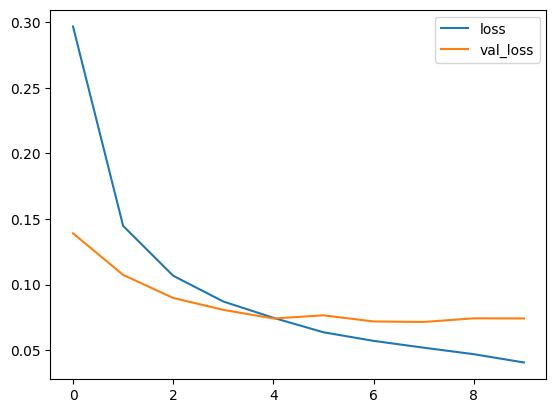

In [8]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

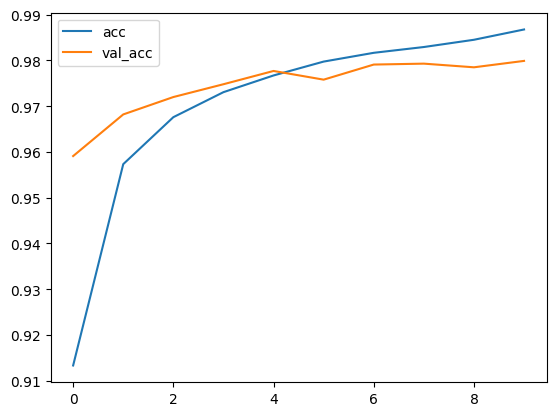

In [9]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [10]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0742 - accuracy: 0.9799
[0.07421033084392548, 0.9799000024795532]


313/313 [==============================] - 2s 4ms/step
Confusion matrix, without normalization
[[ 973    1    0    0    0    0    1    1    2    2]
 [   0 1127    4    0    0    0    1    0    3    0]
 [   2    2 1014    0    1    0    1    8    4    0]
 [   0    0    6  987    0    2    0   10    2    3]
 [   1    0    3    0  964    0    5    1    1    7]
 [   2    2    0   10    1  862    4    3    4    4]
 [   4    3    1    1    6    3  937    0    3    0]
 [   1    5    6    1    2    0    0 1009    1    3]
 [   5    3    4    5    6    2    0    4  942    3]
 [   0    3    0    3   11    1    0    6    1  984]]


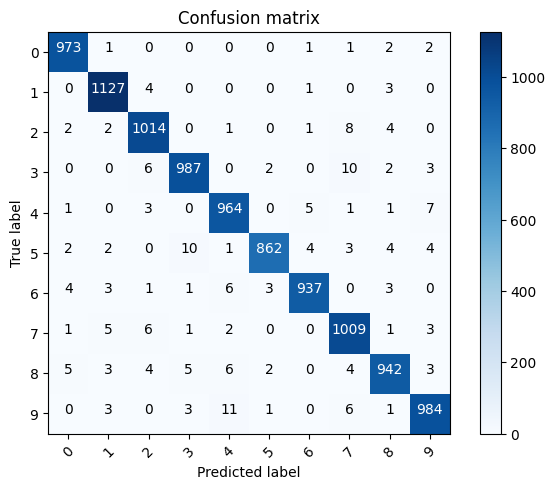

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

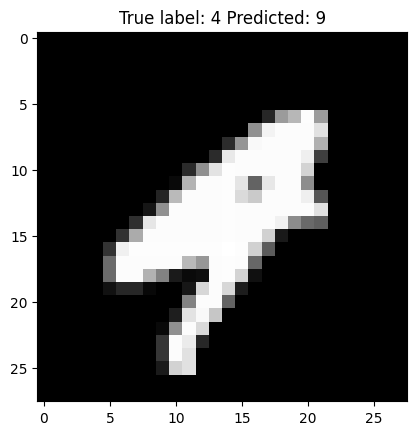

In [20]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));